In [2]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv('crop_production.csv')

In [5]:
df.head(10)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0
8,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sweet potato,5.0,15.0
9,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Tapioca,40.0,169.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [7]:
df.shape

(246091, 7)

In [8]:
df.isna().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [9]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

### Seems Like we have some missing values in "production" colum, so we will start from there

In [10]:
(df['Production'].isnull().sum() /df.shape[0] ) * 100

1.5156994770227274

#### MIssing values amount to only 1.5%(neglegible amount) of total values in dataset, so we can simply drop the rows with missing values

In [11]:
df.dropna(subset=["Production"],axis=0,inplace=True)

In [12]:
df.shape

(242361, 7)

In [13]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

### Now, let's visualize the data to get more understanding

### Checking for Correlation between variables

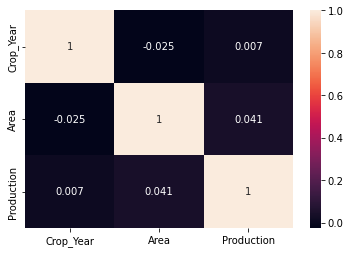

In [14]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Create the correlation heatmap for numeric columns
plt.tick_params(labelsize=10)
sns.heatmap(numeric_df.corr(), annot=True);


### no high-correlation found :(

## Univariate Analysis


In [15]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [16]:
df.State_Name.nunique()

33

### States and UTs combined in State_name column

In [17]:
df.State_Name.value_counts()

State_Name
Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                    

## District Variable

In [18]:
df.District_Name.nunique()

646

In [19]:
df.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [21]:
df.District_Name.value_counts()

District_Name
TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
KHUNTI         6
RAMGARH        6
NAMSAI         1
MUMBAI         1
Name: count, Length: 646, dtype: int64

## Crop Year Variable



In [22]:
df.Crop_Year.value_counts()

Crop_Year
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: count, dtype: int64

In [24]:
print(f"{df.Crop_Year.nunique() = }")
print(f"{df.Crop_Year.min() = }")
print(f"{df.Crop_Year.max() = }")

df.Crop_Year.nunique() = 19
df.Crop_Year.min() = 1997
df.Crop_Year.max() = 2015


### Our Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007–08 and 2006.

### Season Variable



In [25]:
df.Season.value_counts()

Season
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: count, dtype: int64

In [29]:
print(f"{df.Season.nunique() = }")
print(f"{df.Season.unique() = }")
print(f"{df.Season.max() = }")

df.Season.nunique() = 6
df.Season.unique() = array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)
df.Season.max() = 'Winter     '


## Crop Variable

In [30]:
df['Crop'].nunique()

124

In [31]:
df['Crop'].unique()

array(['Arecanut', 'Other Kharif pulses', 'Rice', 'Banana', 'Cashewnut',
       'Coconut ', 'Dry ginger', 'Sugarcane', 'Sweet potato', 'Tapioca',
       'Black pepper', 'Dry chillies', 'other oilseeds', 'Turmeric',
       'Maize', 'Moong(Green Gram)', 'Urad', 'Arhar/Tur', 'Groundnut',
       'Sunflower', 'Bajra', 'Castor seed', 'Cotton(lint)', 'Horse-gram',
       'Jowar', 'Korra', 'Ragi', 'Tobacco', 'Gram', 'Wheat', 'Masoor',
       'Sesamum', 'Linseed', 'Safflower', 'Onion', 'other misc. pulses',
       'Samai', 'Small millets', 'Coriander', 'Potato',
       'Other  Rabi pulses', 'Soyabean', 'Beans & Mutter(Vegetable)',
       'Bhindi', 'Brinjal', 'Citrus Fruit', 'Cucumber', 'Grapes', 'Mango',
       'Orange', 'other fibres', 'Other Fresh Fruits', 'Other Vegetables',
       'Papaya', 'Pome Fruit', 'Tomato', 'Mesta', 'Cowpea(Lobia)',
       'Lemon', 'Pome Granet', 'Sapota', 'Cabbage', 'Rapeseed &Mustard',
       'Peas  (vegetable)', 'Niger seed', 'Bottle Gourd', 'Varagu',
       'Garl

In [33]:
df['Crop'].max()

'other oilseeds'

In [34]:
df['Crop'].min()

'Apple'

In [38]:
df['Crop'].value_counts().head(10)

Crop
Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Arhar/Tur             7476
Name: count, dtype: int64

In [39]:
df['Crop'].value_counts().tail(10)

Crop
Perilla            9
Jobster            9
Turnip             8
Pear               6
Plums              6
Litchi             6
Coffee             6
Apple              4
Peach              4
Other Dry Fruit    1
Name: count, dtype: int64

## Area Variable

In [42]:
df['Area'].nunique()

38391

In [43]:
df['Area'].max()

8580100.0

In [44]:
df['Area'].min()

0.1

In [45]:
df['Area'].value_counts().head(10)

Area
1.0      3573
2.0      3140
100.0    2621
3.0      2478
4.0      2182
5.0      2090
6.0      1750
200.0    1671
10.0     1590
7.0      1555
Name: count, dtype: int64

In [46]:
df['Area'].value_counts().tail(10)

Area
63107.0     1
13655.0     1
95399.0     1
71644.0     1
17459.0     1
25569.0     1
19349.0     1
90302.0     1
39698.0     1
279151.0    1
Name: count, dtype: int64

## Production Variable


In [48]:
df['Production'].describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc50d11e800>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc50d11eda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc50d11e530>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc50d11f340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc50d11f610>],
 'means': []}

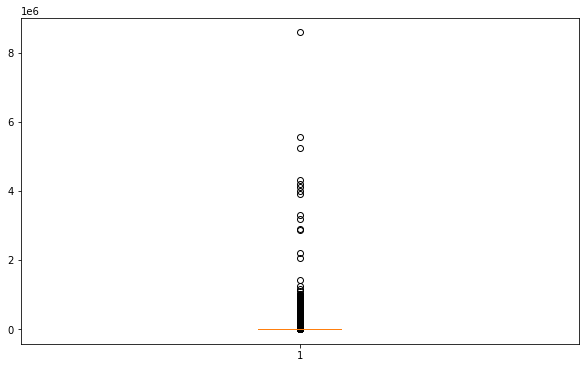

In [53]:
# Let's plot the Area range
plt.figure(figsize=(10, 6))
plt.boxplot(df['Area'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc50d584ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc50d585060>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc50d5847f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc50d585600>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc50d5858d0>],
 'means': []}

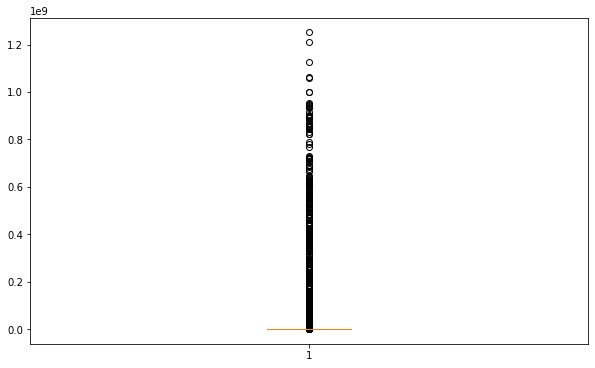

In [52]:
# Let's ploat Production Range
plt.figure(figsize=(10, 6))

plt.boxplot(df['Production'])

### Both Production and Area variables are having many outliers

# Bivariate Analysis



In [57]:
Prod = df.groupby('State_Name')['Production'].sum().reset_index()
Prod = Prod.sort_values(by='Production', ascending=False).head(10)
pd.options.display.float_format = '{:.2f}'.format
Prod

,State_Name,Production
15,Kerala,97880045375.70
1,Andhra Pradesh,17324590296.00
27,Tamil Nadu,12076443048.93
30,Uttar Pradesh,3234492662.70
3,Assam,2111751759.00
32,West Bengal,1397904389.70
17,Maharashtra,1263640606.20
14,Karnataka,863429811.68
0,Andaman and Nicobar Islands,718223239.99
24,Punjab,586385001.00
